<a href="https://colab.research.google.com/github/Manasa130306/SCT_ML_3/blob/main/SVM(dogs%26cats).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.DRRCQG_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


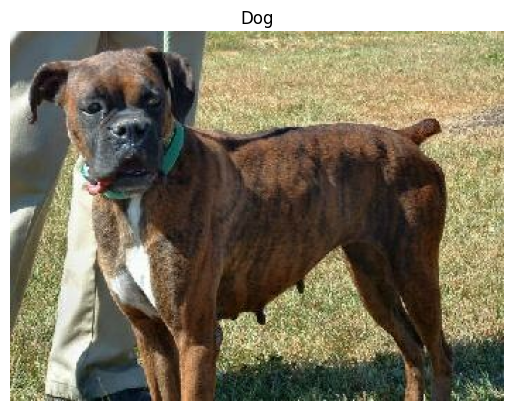

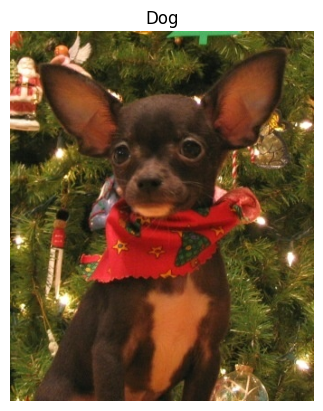

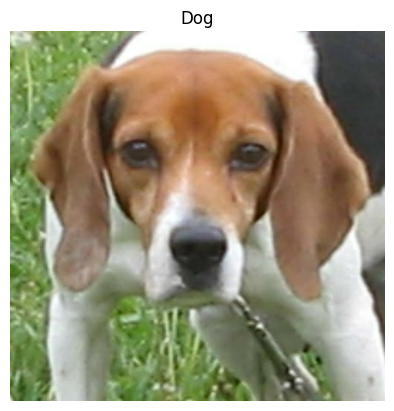

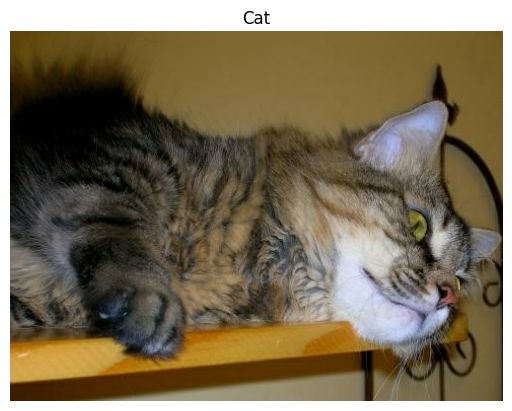

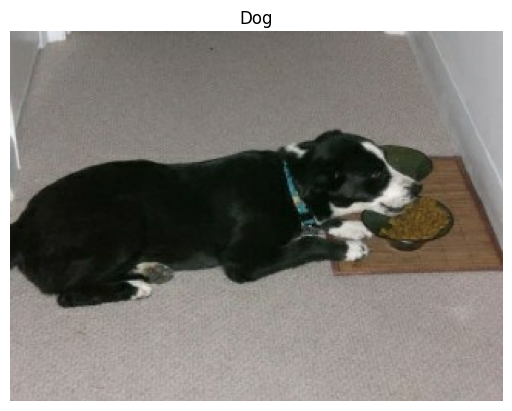

In [12]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

dataset = tfds.load('cats_vs_dogs', split='train[:10%]', as_supervised=True)


for i, (image, label) in enumerate(dataset.take(5)):
    plt.imshow(image.numpy())
    plt.title('Cat' if label.numpy() == 0 else 'Dog')
    plt.axis('off')
    plt.show()


In [14]:
import tensorflow as tf

IMG_SIZE = (224, 224)

def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

dataset = dataset.map(preprocess)


In [15]:
BATCH_SIZE = 32

dataset = dataset.shuffle(1000)
dataset = dataset.batch(BATCH_SIZE)


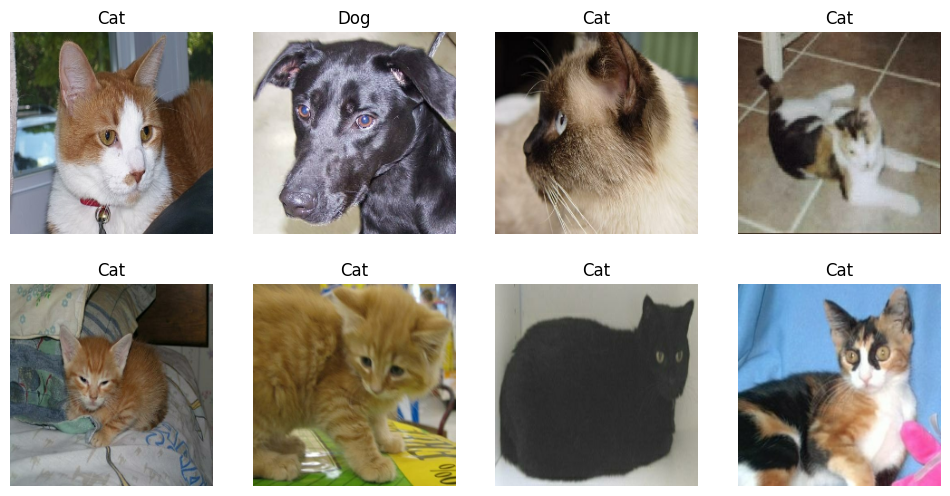

In [17]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

dataset = tfds.load('cats_vs_dogs', split='train[:10%]', as_supervised=True)

IMG_SIZE = (224, 224)
def preprocess(image, label):
    image = tf.image.resize(image, IMG_SIZE)
    image = image / 255.0
    return image, label

dataset = dataset.map(preprocess)

BATCH_SIZE = 32
dataset = dataset.shuffle(1000).batch(BATCH_SIZE)

for images, labels in dataset.take(1):
    plt.figure(figsize=(12, 6))
    for i in range(min(8, images.shape[0])):
        plt.subplot(2, 4, i+1)
        plt.imshow(images[i].numpy())
        plt.title('Cat' if labels[i].numpy() == 0 else 'Dog')
        plt.axis('off')
    plt.show()


In [18]:
import tensorflow_datasets as tfds
import numpy as np
from tqdm import tqdm

dataset = tfds.load('cats_vs_dogs', split='train[:10%]', as_supervised=True)

IMG_SIZE = (64, 64)
images = []
labels = []

for img, label in tqdm(tfds.as_numpy(dataset)):
    img_resized = tf.image.resize(img, IMG_SIZE).numpy()
    img_flat = img_resized.flatten()
    images.append(img_flat)
    labels.append(label)

X = np.array(images)
y = np.array(labels)


100%|██████████| 2326/2326 [00:05<00:00, 452.07it/s]


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train, y_train)


SVC(kernel='linear')

In [21]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Cat', 'Dog']))


Accuracy: 0.5364806866952789
              precision    recall  f1-score   support

         Cat       0.54      0.63      0.58       240
         Dog       0.53      0.44      0.48       226

    accuracy                           0.54       466
   macro avg       0.53      0.53      0.53       466
weighted avg       0.54      0.54      0.53       466

